In [89]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

In [90]:
data = np.loadtxt('cosmic_microwave_background.txt')

Text(0, 0.5, '$B_\\nu$')

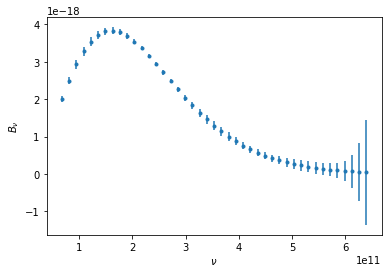

In [91]:
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2]*500, linestyle=' ', marker='o',markersize=3)
plt.xlabel('$\\nu$')
plt.ylabel('$B_\\nu$')

In [92]:
h = 6.62607004e-34
c = 2.99792458e8
k = 1.38064852e-23
nu = data[:,0]
b = data[:,1]
yerr = data[:,2]
def bnu(nu, T):
    return 2*h*nu**3/c**2/(np.exp(h*nu/k/T)-1)

In [93]:
parameter, covarience = optimize.curve_fit(bnu, nu, b, sigma=yerr)

In [94]:
print('best fit temperature: ', str(parameter).strip('[').strip(']'),'K\nuncertainty:', str(covarience).strip('[').strip(']'))

best fit temperature:  2.72501466 K
uncertainty: 6.75400203e-11


Text(0, 0.5, '$B_\\nu$')

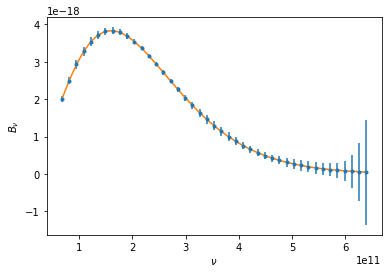

In [95]:
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2]*500, linestyle=' ', marker='o',markersize=3)
plt.plot(nu, bnu(nu, parameter))
plt.xlabel('$\\nu$')
plt.ylabel('$B_\\nu$')

Text(0, 0.5, 'y')

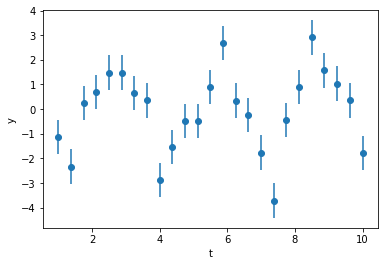

In [96]:
data = np.loadtxt('Sec10problem2.txt')
t = data[:,0]
y = data[:,1]
err = data[:,2]
plt.errorbar(t, y, yerr=err, linestyle=' ', marker='o')
plt.xlabel('t')
plt.ylabel('y')

In [97]:
def model(t, amp, omega, phi):
    return amp*np.cos(omega*t+phi)
par, var = optimize.curve_fit(model, t, y, sigma=err,p0=(np.pi,2,0))
print('Parameters:\n', str(par),'\nCovariance:\n', str(var))

Parameters:
 [2.00652843 2.0744747  0.65874325] 
Covariance:
 [[ 0.04855534 -0.00039454  0.00157843]
 [-0.00039454  0.00178945 -0.01016463]
 [ 0.00157843 -0.01016463  0.07020448]]


In [98]:
print('A =',par[0], '\nwith standard deviation of',np.sqrt(var[0,0]),'\nomega =',par[1], '\nwith standard deviation of',np.sqrt(var[0,0]),'\nphi =',par[2], '\nwith standard deviation of',np.sqrt(var[0,0]),)

A = 2.00652842790873 
with standard deviation of 0.22035276725477887 
omega = 2.0744747032686712 
with standard deviation of 0.22035276725477887 
phi = 0.6587432472955884 
with standard deviation of 0.22035276725477887


Text(0, 0.5, 'y')

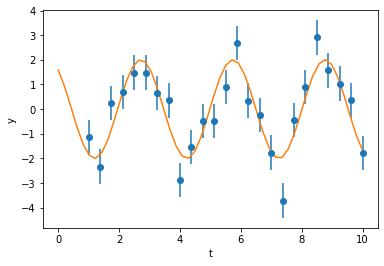

In [99]:
plt.errorbar(t, y, yerr=err, linestyle=' ', marker='o')
plt.plot(np.linspace(0,10), model(np.linspace(0,10), par[0], par[1], par[2]))
plt.xlabel('t')
plt.ylabel('y')